In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file from github
df = pd.read_csv("https://raw.githubusercontent.com/nguye639/DSCI_Project/master/cleanData.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_11,Bill_12,Bill_13,Bill_14,Bill_15,Bill_16,Bill_17,Bill_18,Bill_19,Bill_20,Bill_21,Bill_22,Bill_23,Bill_24,Bill_25,Bill_26,Bill_27,Bill_28,Bill_29,Bill_30,Bill_31,Bill_32,Bill_33,Bill_34,Bill_35,Bill_36,Bill_37,...,Bill_271,Bill_272,Bill_273,Bill_274,Bill_275,Bill_276,Bill_277,Bill_278,Bill_279,Bill_280,Bill_281,Bill_282,Bill_283,Bill_284,Bill_285,Bill_286,Bill_287,Bill_288,Bill_289,Bill_290,Bill_291,Bill_292,Bill_293,Bill_294,Bill_295,Bill_296,Bill_297,Bill_298,Bill_299,Bill_300,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Yea,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [5]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# data frame before label encoding
df.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_11,Bill_12,Bill_13,Bill_14,Bill_15,Bill_16,Bill_17,Bill_18,Bill_19,Bill_20,Bill_21,Bill_22,Bill_23,Bill_24,Bill_25,Bill_26,Bill_27,Bill_28,Bill_29,Bill_30,Bill_31,Bill_32,Bill_33,Bill_34,Bill_35,Bill_36,Bill_37,...,Bill_271,Bill_272,Bill_273,Bill_274,Bill_275,Bill_276,Bill_277,Bill_278,Bill_279,Bill_280,Bill_281,Bill_282,Bill_283,Bill_284,Bill_285,Bill_286,Bill_287,Bill_288,Bill_289,Bill_290,Bill_291,Bill_292,Bill_293,Bill_294,Bill_295,Bill_296,Bill_297,Bill_298,Bill_299,Bill_300,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Yea,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [7]:
#label encoder
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# loops through all 311 bills
# Yea - 1
# Nay - 0
le.fit(df["Bill_10"])
for i in range(1,311):
    df["Bill_"+str(i)] = le.transform(df["Bill_"+str(i)])
print(le.classes_)
df.head()

['Nay' 'Yea']


,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_11,Bill_12,Bill_13,Bill_14,Bill_15,Bill_16,Bill_17,Bill_18,Bill_19,Bill_20,Bill_21,Bill_22,Bill_23,Bill_24,Bill_25,Bill_26,Bill_27,Bill_28,Bill_29,Bill_30,Bill_31,Bill_32,Bill_33,Bill_34,Bill_35,Bill_36,Bill_37,...,Bill_271,Bill_272,Bill_273,Bill_274,Bill_275,Bill_276,Bill_277,Bill_278,Bill_279,Bill_280,Bill_281,Bill_282,Bill_283,Bill_284,Bill_285,Bill_286,Bill_287,Bill_288,Bill_289,Bill_290,Bill_291,Bill_292,Bill_293,Bill_294,Bill_295,Bill_296,Bill_297,Bill_298,Bill_299,Bill_300,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,Virginia,Democrat,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,Illinois,Republican,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,California,Democrat,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
4,adam_smith,Washington,Democrat,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


In [8]:
from scipy import stats

# list of Democrats who voted against their own party for all the bills
demAgainst = []

# iterating over the range of bills
# the mode is calculated for every bill
# for each vote in every bill, if the vote is not equal to the mode of that bill
# the counter is appended
# this counts the number of Democrats who voted against their party
# for each bill
for i in range(1,311):
    counter = 0
    demMode = stats.mode(df["Bill_"+str(i)][df["Party"] == "Democrat"])
    for j in df["Bill_"+str(i)][df["Party"] == "Democrat"]:
        if j != demMode[0][0]:
            counter +=1
    demAgainst.append(counter)

In [9]:
# the most common value for votes from the Democrat party
demMode[0][0]

1

In [11]:
# List of the number of democrats who voted against their party for all 311 bills
demAgainst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 97,
 1,
 0,
 0,
 93,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 43,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 4,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 1,
 65,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 14,
 2,
 1,
 0,
 0,
 4,
 0,
 0,
 1,
 12,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 84,
 0,
 1,
 0,
 0,
 41,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 86,
 0,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
# On average, 3 democrats voted against their party
np.mean(demAgainst)

3.867741935483871

In [13]:
# list of Republicans who voted against their own party for all the bills
repAgainst = []
# iterating over the range of bills
for i in range(1,311):
    counter = 0
    repMode = stats.mode(df["Bill_"+str(i)][df["Party"] == "Republican"])
    for j in df["Bill_"+str(i)][df["Party"] == "Republican"]:
        if j != repMode[0][0]:
            counter +=1
    repAgainst.append(counter)

In [15]:
# List of all 311 bills where the republicans voted against their party
repAgainst

[2,
 0,
 0,
 0,
 0,
 0,
 2,
 83,
 64,
 0,
 0,
 1,
 0,
 0,
 10,
 63,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 26,
 19,
 26,
 28,
 0,
 0,
 0,
 0,
 11,
 0,
 2,
 3,
 0,
 11,
 3,
 10,
 1,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 18,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 24,
 0,
 5,
 40,
 0,
 7,
 0,
 8,
 0,
 2,
 0,
 0,
 3,
 73,
 4,
 11,
 0,
 31,
 29,
 12,
 14,
 38,
 0,
 9,
 0,
 30,
 0,
 0,
 29,
 14,
 38,
 37,
 11,
 8,
 0,
 0,
 13,
 49,
 2,
 27,
 1,
 2,
 8,
 8,
 5,
 1,
 16,
 1,
 16,
 40,
 38,
 5,
 101,
 1,
 0,
 0,
 0,
 67,
 0,
 1,
 0,
 0,
 71,
 1,
 0,
 76,
 36,
 1,
 0,
 74,
 0,
 1,
 10,
 0,
 28,
 99,
 0,
 62,
 0,
 0,
 74,
 30,
 23,
 2,
 0,
 0,
 35,
 1,
 0,
 0,
 0,
 69,
 22,
 21,
 31,
 0,
 13,
 0,
 8,
 47,
 1,
 0,
 14,
 2,
 49,
 9,
 0,
 0,
 0,
 103,
 14,
 24,
 29,
 1,
 33,
 0,
 26,
 12,
 67,
 68,
 90,
 0,
 0,
 46,
 11,
 2,
 1,
 3,
 67,
 2,
 0,
 0,
 0,
 1,
 9,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 100,
 0,
 2,
 8,
 0,
 23,
 16,
 2,
 0,
 0,
 0,
 0,
 0,
 6,
 51,
 1,
 14,
 60,
 7,
 7,
 0,
 

In [16]:
# On average, 12 republicans voted against their own party
np.mean(repAgainst)

12.993548387096775

In [17]:
# LGBTQ Business Equal Credit Enforcement and Investment Act
df.groupby("Bill_180")["Party"].value_counts()

Bill_180  Party     
0         Republican    181
1         Democrat      224
          Republican     33
Name: Party, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 720x504 with 0 Axes>

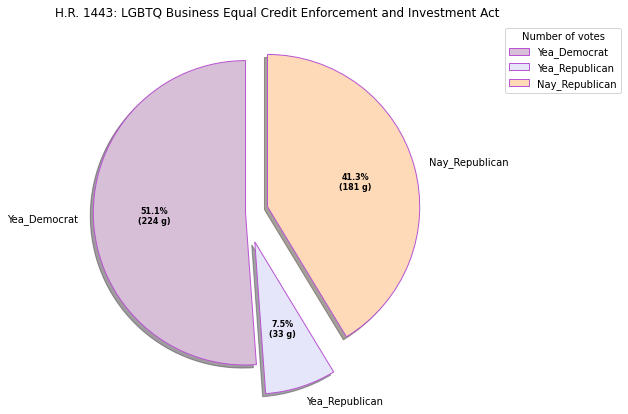

In [18]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
Values = ['Yea_Democrat', 'Yea_Republican','Nay_Republican']
Counts = [224, 33, 181]
#plt.pie(Counts, labels = Values)

# Creating explode data
# used to emphasize the slice
# 50% of the radius exploded out
# for the Not_Voting slice
explode = (0, 0.2, 0.15)
  
# Creating color parameters
colors = ( "thistle", "lavender", "peachpuff")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "mediumorchid" }
  
# Creating autocpt arguments
def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Counts, 
                                  autopct = lambda pct: func(pct, Counts),
                                  explode = explode, 
                                  labels = Values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, Values,
          title ="Number of votes",
          loc ="left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("H.R. 1443: LGBTQ Business Equal Credit Enforcement and Investment Act", loc = 'left')
  
# show plot
plt.show()

In [19]:
# Bill for H.R. 7: Paycheck Fairness Act
df["Bill_106"].value_counts()

1    225
0    213
Name: Bill_106, dtype: int64

In [20]:
df.groupby("Bill_106")["Party"].value_counts()

Bill_106  Party     
0         Republican    213
1         Democrat      224
          Republican      1
Name: Party, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 720x504 with 0 Axes>

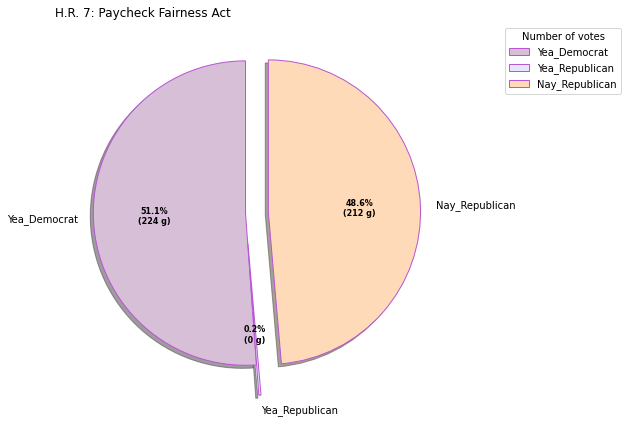

In [21]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
Values = ['Yea_Democrat', 'Yea_Republican','Nay_Republican']
Counts = [224, 1, 213]
#plt.pie(Counts, labels = Values)

# Creating explode data
# used to emphasize the slice
# 50% of the radius exploded out
# for the Not_Voting slice
explode = (0, 0.2, 0.15)
  
# Creating color parameters
colors = ( "thistle", "lavender", "peachpuff")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "mediumorchid" }
  
# Creating autocpt arguments
def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Counts, 
                                  autopct = lambda pct: func(pct, Counts),
                                  explode = explode, 
                                  labels = Values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, Values,
          title ="Number of votes",
          loc ="left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("H.R. 7: Paycheck Fairness Act", loc = 'left')
  
# show plot
plt.show()

In [22]:
# H.R. 3755: Women’s Health Protection Act of 2021
df.groupby("Bill_293")["Party"].value_counts()

Bill_293  Party     
0         Republican    214
          Democrat        1
1         Democrat      223
Name: Party, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 720x504 with 0 Axes>

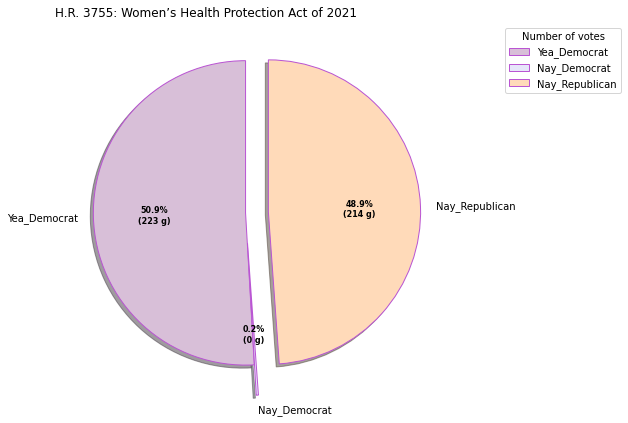

In [23]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
Values = ['Yea_Democrat', 'Nay_Democrat','Nay_Republican']
Counts = [223, 1, 214]
#plt.pie(Counts, labels = Values)

# Creating explode data
# used to emphasize the slice
# 50% of the radius exploded out
# for the Not_Voting slice
explode = (0, 0.2, 0.15)
  
# Creating color parameters
colors = ( "thistle", "lavender", "peachpuff")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "mediumorchid" }
  
# Creating autocpt arguments
def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Counts, 
                                  autopct = lambda pct: func(pct, Counts),
                                  explode = explode, 
                                  labels = Values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, Values,
          title ="Number of votes",
          loc ="left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("H.R. 3755: Women’s Health Protection Act of 2021", loc = 'left')
  
# show plot
plt.show()